[[-0.57609252 -0.31939293]
 [ 0.97066736 -1.01803924]
 [ 0.32588679 -0.87420857]
 [-0.85203524 -0.69086254]
 [ 0.06475555 -0.22296778]
 [ 0.60831687 -0.89889651]
 [ 0.15748388 -0.3956682 ]
 [ 0.60629026  0.04728686]
 [ 0.38337485  0.07355382]
 [ 0.18357837  1.01167568]
 [-1.11602228  0.46576795]
 [ 0.108916    0.26262607]
 [ 0.94112886 -0.22913852]
 [-0.42328054 -0.05314014]
 [-0.05161197 -0.19279682]
 [-0.49269402 -0.48094144]
 [-0.95623538 -0.40336282]
 [ 0.26928702 -0.92104629]
 [-0.48709984  0.21210984]
 [ 1.34875184 -0.64443495]
 [-0.23274053 -0.84521791]
 [-1.066519   -1.36442652]
 [-1.59264318 -1.19625472]
 [-0.83664188  0.09673199]
 [-1.27249809 -0.62683866]
 [-1.11710742  0.54115016]
 [ 0.91468387 -0.13531135]
 [ 0.33984719  0.43756423]
 [ 0.67295834 -0.5627403 ]
 [ 0.33861531  0.09315398]
 [ 0.0897232   0.42472012]
 [ 0.29372891  0.26954265]
 [ 0.12658623 -0.49437376]
 [ 0.1272759  -0.28660898]
 [ 0.23467347 -0.36520863]
 [ 0.15399029  0.28688976]
 [-0.669559    0.19543567]
 

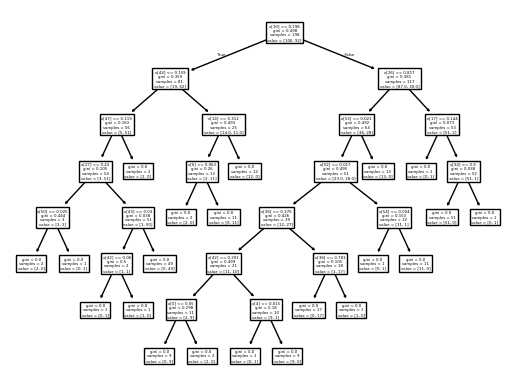

Acurácia média com validação cruzada: 0.60 ± 0.15
Results grid_search: [0.64761905 0.64761905 0.63809524 0.67619048 0.67619048 0.66666667
 0.68571429 0.66666667 0.66666667 0.64761905 0.67619048 0.65714286
 0.64761905 0.62857143 0.64761905 0.65714286 0.63809524 0.65714286
 0.65714286 0.64761905 0.65714286 0.6952381  0.65714286 0.67619048
 0.66666667 0.66666667 0.65714286 0.65714286 0.65714286 0.63809524
 0.63809524 0.63809524 0.63809524 0.65714286 0.65714286 0.63809524
 0.63809524 0.64761905 0.63809524 0.62857143 0.62857143 0.65714286
 0.64761905 0.64761905 0.62857143 0.63809524 0.64761905 0.61904762
 0.61904762 0.60952381 0.58095238 0.57142857 0.60952381 0.60952381
 0.58095238 0.57142857 0.58095238 0.59047619 0.59047619 0.6
 0.60952381 0.60952381 0.59047619 0.62857143 0.6        0.59047619
 0.59047619 0.59047619 0.57142857 0.58095238 0.57142857 0.57142857
 0.59047619 0.59047619 0.6        0.58095238 0.57142857 0.58095238
 0.57142857 0.59047619 0.57142857 0.58095238 0.58095238 0.5809523

ValueError: y_true takes value in {'M', 'R'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

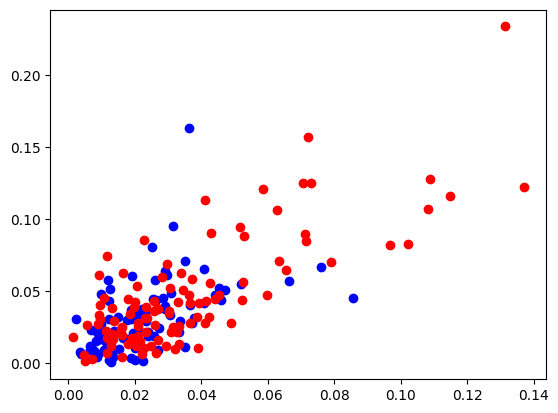

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
from sklearn import model_selection, neighbors, decomposition, model_selection, tree, metrics
from sklearn.metrics import confusion_matrix, classification_report

def carrega_dados(url, valorpadrao):
    df = pd.read_csv(url, sep=',', header=None, encoding='utf-8')
    data=df.drop(columns=[60])
    target = df[60]
    return data, target

def classificar (decision_tree, atributos, target, param_grid):
  grid_search = model_selection.GridSearchCV(decision_tree, param_grid, cv=5)
  grid_search.fit (atributos, target)
  results = grid_search.cv_results_
  best_estimator = grid_search.best_estimator_
  return results, best_estimator

df, target = carrega_dados('sonar_dataset.csv',0)

# Atividade 1. Criação das features:Aplicar Análise de Componentes Principais (PCA) para reduzir a dimensionalidade dos conjuntos de dados
atributos_pcas = {}
pca = decomposition.PCA(n_components=2)
atributos_pca = pca.fit_transform (df.values)
print(atributos_pca)

# Atividade 2. Modelo de ML:  Desenvolver e treinar modelos de árvores de decisão para tarefas de classificação.
X_train, X_test, y_train, y_test = model_selection.train_test_split (df.values, target.values, test_size=10)
decision_tree = tree.DecisionTreeClassifier ()
modelo = decision_tree.fit (X_train, y_train)
previstos = modelo.predict (X_test)
print ("previstos: ", previstos)
print ("y_test   : ", y_test)

tree.plot_tree (modelo)
plt.show()

# Atividade 3 - Avaliação de Modelos: Aplicar técnicas de validação cruzada para estimar a eficiência dos modelos desenvolvidos.
knn = neighbors.KNeighborsClassifier(3)
results = model_selection.cross_val_score(knn, df.values, target.values, cv=10)
print(f"Acurácia média com validação cruzada: {results.mean():.2f} ± {results.std():.2f}")

# Atividade 4 - Busca Hiperparamétrica: Utilizar GridSearch para otimizar os hiperparâmetros dos modelos.
param_grid = {'n_neighbors': np.linspace(10, 100, 90).astype('int')}
param_distributions = {'n_neighbors' : randint(10, 100)}
grid_search = model_selection.GridSearchCV(estimator=knn, param_grid=param_grid, cv=10)
random_search = model_selection.RandomizedSearchCV(estimator=knn,
  param_distributions=param_distributions,
  n_iter=2)
grid_search.fit (df.values, target.values)
random_search.fit (df.values, target.values)
results_grid = np.array([grid_search.cv_results_[f'split{i}_test_score'] for i in range (0, 5)])
results_rand = np.array([random_search.cv_results_[f'split{i}_test_score'] for i in range (0, 5)])
print (f"Results grid_search: {results_grid.mean(axis=0)}")
print (f"Results random_search: {results_rand.mean(axis=0)}")

# Atividade 5 - Pruning de Árvores de Decisão: Realizar o pruning (poda) em árvores de decisão para prevenir o overfitting e melhorar a generalização do modelo.
param_grid2 = {"max_depth": [2, 4, 6, 8, 10]}
results, best_estimator = classificar (tree.DecisionTreeClassifier(), df.values, target.values, param_grid2)
print (f"Tempo médio de Teste   : {results['mean_score_time']}")
print (f"Acurácia média de Teste: {results['mean_test_score']}")
print (f"Profundidade máxima    : {best_estimator.tree_.max_depth}")

print (best_estimator.tree_.feature)
print (best_estimator.tree_.threshold)
plt.scatter (df.values[:, 0][target.values=='R'], df.values[:, 1][target.values=='R'], color='blue')
plt.scatter (df.values[:, 0][target.values=='M'], df.values[:, 1][target.values=='M'], color='red')

# Atividade 6 - Avaliação de Classificadores Binários: Utilizar figuras de mérito como Curva ROC, precisão, recall, f1-score, sensibilidade e especificidade para avaliar os modelos
treino_a, teste_a, treino_c, teste_c = model_selection.train_test_split(df.values, target.values, train_size=0.8, random_state=42)
knn.fit(treino_a, treino_c)
previstos = knn.predict(teste_a)
y_probs = knn.predict_proba(teste_a)[:, 1]
conf_matrix = confusion_matrix(previstos, teste_c)
print("Matriz de Confusão:")
print(conf_matrix)
print('previstos:', previstos)

((TN, FP), (FN, TP)) = conf_matrix
especificidade = TN / (TN + FP)
sensibilidade = TP / (TP + FN)
acuracia = metrics.accuracy_score(previstos, teste_c)
#precisao = metrics.precision_score(previstos, teste_c)
#recall = metrics.recall_score(previstos, teste_c)
#f1_score = metrics.f1_score(previstos, teste_c)

print(f"Especificidade: {especificidade:.2f}")
print(f"Sensibilidade : {sensibilidade:.2f}")
print(f"Acurácia      : {acuracia:.2f}")
#print(f"Precisão      : {precisao:.2f}")
#print(f"Recall        : {recall:.2f}")
#print(f"F1 Score      : {f1_score:.2f}")


